<a href="https://colab.research.google.com/github/MariaNguen/Kaggle_NLP_Disaster-Tweets/blob/main/Kaggle_NLP_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import re
import string

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
data = pd.read_csv('/content/train.csv', encoding='utf-8')

In [5]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [193]:
def remove_URL(text):
  # http:... / https:... / www... 
  url = re.compile(r'https?://\S+|www\.\S+')
  return re.sub(url,'',text)

In [194]:
def remove_at_tag(text):
  at_tag = re.compile(r'@\S+')
  return re.sub(at_tag, '', text)


In [25]:
data.text[data['target'] == 1]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

In [203]:
data['clean'] = data['text'].apply(lambda x: remove_at_tag(x))
data['clean'] = data['text'].apply(lambda x: remove_url(x))

In [204]:
data.clean.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: clean, dtype: object

In [196]:
text_wc0 = " ".join(tweet for tweet in data.clean[data['target'] == 0])

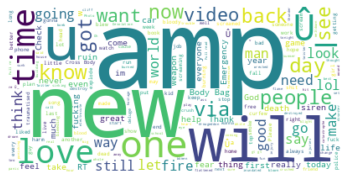

In [197]:
# Create stopword list:
stop_words = set(STOPWORDS)

# Generate a word cloud image
wordcloud0 = WordCloud(stopwords=stop_words, background_color="white").generate(text_wc0)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis("off")
plt.show()

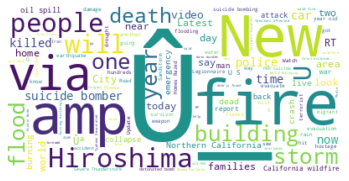

In [128]:
text_wc1 = " ".join(tweet for tweet in data.clean[data['target'] == 1])

# Generate a word cloud image
wordcloud1 = WordCloud(stopwords=stop_words, background_color="white").generate(text_wc1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [130]:
print(wordcloud1.words_.keys())

dict_keys(['Û_', 'fire', 'New', 'amp', 'via', 'Hiroshima', 'people', 'U', 'will', 'building', 'one', 'storm', 'year', 'flood', 'death', 'suicide bomber', 'car', 'police', 'killed', 'now', 'time', 'video', 'Ûª', 'home', 'say', 'world', 'day', 'Latest', 'City', 'look', 'area', 'RT', 'today', 'near', 'families', 'two', 'Northern California', 'live', 'emergency', 'dead', 'burning', 'crash', 'oil spill', 'man', 'attack', 'back', 'collapse', 'California wildfire', 'war', 'report', 'U S', 'suicide bombing', 'earthquake', 'flooding', 'S', 'Û', 'hit', 'water', 'Update', 'damage', 'survivor', 'Watch', 'evacuation', 'got', 'know', 'another', 'terrorist', 'Legionnaire', 'Homes Razed', 'rain', 'see', 'Road', 'way', 'weapon', 'hostage', 'going', 'flames', 'drought', 'evacuate', 'hundreds', 'migrant', 'Sandstorm', 'year old', 'Severe Thunderstorm', '16yr old', 'PKK suicide', 'detonated bomb', 'accident', 'Please', 'first', 'Iran', 'sue', 'MH370 Malaysia', 'mass murder', 'old PKK', 'wild fire', 'Photo

In [122]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [133]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [134]:
stop_words.update(stopwords.words('english'))

In [136]:
list(set(wordcloud1.words_.keys()) & set(wordcloud0.words_.keys()))

['death',
 'year',
 'home',
 'think',
 'one',
 'house',
 'cause',
 'Û',
 'work',
 'hostage',
 'Please',
 'now',
 'fire',
 'going',
 'make',
 'two',
 'video',
 'call',
 'got',
 'bomb',
 'dead',
 'look',
 'first',
 'said',
 'w',
 'via',
 'RT',
 'see',
 'back',
 'day',
 'another',
 'way',
 'know',
 'life',
 'car',
 'even',
 'set',
 'today',
 'burning',
 'Ûª',
 'time',
 'Û_',
 'go',
 'thunder',
 'Photo',
 'say',
 'world',
 'police',
 'building',
 'hit',
 'amp',
 'come',
 'run',
 'need',
 'live',
 'will',
 'weapon',
 'people',
 'may',
 'man',
 'help']

In [137]:
stop_words.update(['Û_', 'Ûª', 'Û'])

In [138]:
stoppunct = stop_words
stoppunct.update(string.punctuation)

In [141]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [205]:
def remove_other(text):
  hash = re.compile(r'[#Û]')
  return re.sub(hash,'',text)

In [206]:
data['clean2'] = data['clean'].apply(lambda x: remove_other(x))

In [207]:
data.clean2

0       Our Deeds are the Reason of this earthquake Ma...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive wildfires evacuation ord...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609      The out of control wild fires in California ...
7610          M1.94 [01:04 UTC]?5km S of Volcano Hawaii. 
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: clean2, Length: 7613, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'],data['target'], stratify=data['target'])
X_train.head(4)

3352    Ahrar Al Sham: In our negotiations with Iran o...
3405    KS except every character is Shizune.\nThe wor...
1960    'The cyclone derives its powers from a calm ce...
1980    #Rohingya houses in #Kyee NockThie hamlet from...
Name: text, dtype: object

In [7]:
!pip install -q tf-models-official==2.11.0

In [8]:
!pip install -q -U "tensorflow-text==2.11.*"

In [9]:
import tensorflow as tf
import tensorflow_hub as hub
from official.nlp import optimization  # to create AdamW optimizer
import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')

In [10]:
import tensorflow_addons as tfa

In [11]:
import numpy as np

In [12]:
import tensorflow_text as text

In [13]:
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [14]:
bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess)
bert_encoder = hub.KerasLayer(tfhub_handle_encoder)

In [15]:
def build_classifier_model():
  #Bert Layers
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)

  #Neural network layers
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1, name='dropout')(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [16]:
classifier_model = build_classifier_model()

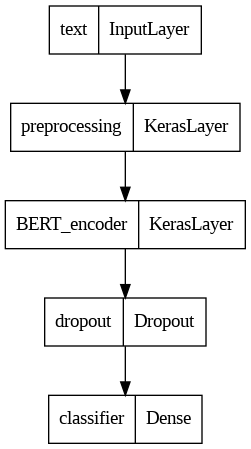

In [17]:
tf.keras.utils.plot_model(classifier_model)

In [18]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
metrics = tf.metrics.BinaryAccuracy()

In [19]:
batch_size = 32

In [20]:
epochs = 10
steps_per_epoch = round(X_train.shape[0]/batch_size)
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [21]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [22]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(X_train,y_train,validation_split=0.2,epochs=epochs)
#history = classifier_model.fit(X_train,y_train,epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1
Epoch 1/10
143/143 [==============================] - 262s 2s/step - loss: 0.6531 - binary_accuracy: 0.6258 - val_loss: 0.5080 - val_binary_accuracy: 0.7680
Epoch 2/10
143/143 [==============================] - 236s 2s/step - loss: 0.4983 - binary_accuracy: 0.7648 - val_loss: 0.4309 - val_binary_accuracy: 0.8091
Epoch 3/10
143/143 [==============================] - 234s 2s/step - loss: 0.4422 - binary_accuracy: 0.7983 - val_loss: 0.4208 - val_binary_accuracy: 0.8275
Epoch 4/10
143/143 [==============================] - 232s 2s/step - loss: 0.3984 - binary_accuracy: 0.8303 - val_loss: 0.4219 - val_binary_accuracy: 0.8257
Epoch 5/10
143/143 [==============================] - 234s 2s/step - loss: 0.3799 - binary_accuracy: 0.8310 - val_loss: 0.4307 - val_binary_accuracy: 0.8240
Epoch 6/10
143/143 [==============================] - 236s 2s/step - loss: 0.3483 - binary_accuracy: 0.8472 - val_loss: 0.4

In [23]:
loss, accuracy = classifier_model.evaluate(X_test,y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

60/60 [==============================] - 25s 423ms/step - loss: 0.4452 - binary_accuracy: 0.8178
Loss: 0.4452266991138458
Accuracy: 0.8177521228790283


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


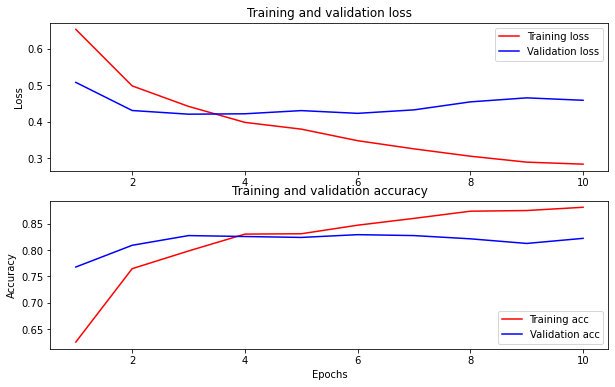

In [24]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [25]:
f1 = tfa.metrics.F1Score(num_classes=2, threshold=0.5, average='micro')

In [26]:
y_predicted = classifier_model.predict(X_test)
y_predicted = y_predicted.flatten()

60/60 [==============================] - 26s 422ms/step


In [289]:
y_predicted

array([0.31930965, 0.9048333 , 0.4693922 , ..., 0.05570558, 0.08532699,
       0.9651968 ], dtype=float32)

In [27]:
y_true = y_test.values

In [28]:
f1.update_state(y_true, y_predicted)
result = f1.result()

In [29]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=0.7864615>

In [30]:
test = pd.read_csv('/content/test.csv', encoding='utf-8')

In [31]:
predictions = classifier_model.predict(test.text)

102/102 [==============================] - 55s 538ms/step


In [32]:
predictions = np.where(predictions > 0.5, 1, 0)
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [33]:
submission = pd.DataFrame(test.id)

In [34]:
submission['target'] = predictions

In [35]:
submission.to_csv('/content/submission3.csv', sep=',', header=True, index=False, encoding='utf-8')